<a href="https://colab.research.google.com/github/import023/Python-ExploratoryDataAnalysis/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

여러분들은 데이터 분석가이고, 대형 스포츠 센터로부터 데이터 분석 의뢰를 받았습니다.

고객은 근 1년 간(2018년 4월 ~ 2019년 3월) 회원 수가 크게 늘지 않고 있어서 그 원인을 파악하고 싶어합니다. 이 대형 스포츠 센터에는 하루 종일 사용할 수 있는 종일 회원, 낮에만 사용하는 주간 회원, 밤에만 사용하는 야간 회원이 있습니다. 또한, 가끔 입회비 반액 할인이나 입회비 무료와 같은 행사도 종종 진행하여 회원 수를 늘리고자 시도합니다. 탈퇴를 신청하면 다음 달 말에 탈퇴가 됩니다.

처음 고객에게 받은 데이터는 총 4개입니다.

- use_log.csv : 센터 이용 이력. (2018년 4월 ~ 2019년 3월)
- customer_master.csv : 2019년 3월 말 시점의 회원 데이터, 이전 탈퇴 회원 데이터 포함.
- class_master.csv : 회원 구분
- campaign_master.csv : 가입 시 행사 종류 데이터

In [ ]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

Colab에 customer.zip 파일을 업로드한 후에 다음의 명령어로 압축을 해제합니다.

In [ ]:
# 파일 압축 풀기
!unzip customer.zip

Archive:  customer.zip
 extracting: campaign_master.csv     
 extracting: class_master.csv        
  inflating: customer_join.csv       
  inflating: customer_master.csv     
  inflating: customer_newer.csv      
  inflating: use_log.csv             
  inflating: use_log_months.csv      


현재 경로에 있는 파일들의 목록을 확인해봅시다.

In [ ]:
# 현재 폴더 경로에 존재하는 데이터를 리스팅
%ls

campaign_master.csv  customer_master.csv  sample_data/
class_master.csv     customer_newer.csv   use_log.csv
customer_join.csv    customer.zip         use_log_months.csv


#데이터 로드

다수의 파일들이 존재합니다. 우선 use_log.csv를 데이터프레임으로 로드합니다.

In [ ]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


샘플의 개수가 총 197,428개인 uselog는 고객 ID, 이용일을 포함한 간단한 데이터로 고객이 언제 센터를 이용했는지를 알 수 있는 데이터입니다.

다음은 customer_master.csv 파일을 데이터프레임으로 로드합니다.

In [ ]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


총 4,192개의 샘플이 있는 customer 데이터는 회원 데이터로 고객 ID, 이름, 회원 클래스, 성별, 등록일 정보가 들어가있습니다. 이름은 XXX 내지는 XXXXX 처리가 되어있는데, 고객 정보 보호를 위해 비공개처리가 된 것으로 보입니다.

 is_deleted 열은 2019년 3월 시점에 탈퇴한 유저를 시스템에서 빨리 찾기 위한 열입니다. customer_id 열이 존재하는데, 이는 uselog에서도 동일하게 있었던 열로 이 두 가지 열은 두 데이터가 공통적으로 가지고 있는 열입니다. (두 데이터를 연결시킬 수 있다는 의미입니다.) 또한 is_deleted 열을 통해 알 수 있는 점은 customer 데이터에는 현재 이미 탈퇴한 회원들에 대한 정보도 포함되어져 있다는 겁니다.

다음은 class_master.csv를 데이터프레임으로 로드합니다.

In [ ]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


class_master는 총 3개의 샘플이 존재합니다. 바로 종일, 주간, 야간이며 가격은 각각 다릅니다.

다음은 campaign_master.csv를 데이터프레임으로 로드합니다.

In [ ]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


행사의 종류를 담고 있는 데이터인 campaign_master는 총 3개의 샘플이 존재합니다. 바로 일반, 입회비반액할인, 입회비무료입니다.



#레프트 조인

오늘 강의에서는 레프트 조인이라는 것을 사용합니다. 레프트 조인을 진행하기 전에 예시를 통해서 간단히 레프트 조인에 대해서 이해해봅시다.

In [ ]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
DF1 = DataFrame([["싸이",180,75],["덕구",160,65],["또치",170,75]], columns = ["이름","키","몸무게"])
DF1

,이름,키,몸무게
0,싸이,180,75
1,덕구,160,65
2,또치,170,75


In [ ]:
DF2 = DataFrame([["싸이","포워드","잘함"],["덕구","미드필더","못함"],["똥갈","수비수","잘함"]], columns = ["이름","포지션","실력"])
DF2

,이름,포지션,실력
0,싸이,포워드,잘함
1,덕구,미드필더,못함
2,똥갈,수비수,잘함


레프트 조인은 좌측에 있는 데이터는 모두 사용하되, 우측에 있는 데이터를 좌측에 있는 데이터에 맞추어서 결합하는 것을 말합니다.

- 왼쪽 DataFrame의 모든 데이터는 출력! 즉, 최종 데이터의 개수는 왼쪽 DataFrame의 개수와 일치  
- 오른쪽 DataFrame 중 왼쪽 DataFrame에 있는 Data는 출력  
- 오른쪽 DataFrame 중 왼쪽 DataFrame에 없는 Data는 Null 값 처리  

In [ ]:
pd.merge(left = DF1 , right = DF2, how = "left", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180,75,포워드,잘함
1,덕구,160,65,미드필더,못함
2,또치,170,75,NaN,NaN


In [ ]:
# 이미지 설명을 위한 코드
from IPython.display import Image
Image('left join.jpeg')

데이터의 결합 방식인 'join에 대한 참고 자료 : https://programmerpsy.tistory.com/17

#데이터 가공

이렇게 갖고있는 데이터가 여러 개로 분리되어서 관리가 되고 있을 때, 이 데이터들이 서로 결합이 가능한 부분이 있고, 통합해서 추가적으로 분석이 가능한 부분이 있어보인다면 실제로 데이터를 통합하여 분석을 진행할 수 있습니다. 여러분들이 데이터를 유심히 관찰한다면 아래와 같은 결론을 얻어낼 수 있습니다.  

- customer에는 'class'열이 존재하고, class 데이터에도 'class'열이 존재한다. 이 둘을 결합한다면, 고객들이 어떤 종류, 그리고 어떤 가격의 class를 듣고 있는지 알 수 있을 것이다.
- customer에는 'campaign_id'열이 존재하고, campaign_master 데이터에도 'campaign_id'열이 존재한다. 이 둘을 결합한다면 고객들이 어떤 이름의 campaign을 듣고 있는지를 알 수 있을 것이다.

customer 데이터에 회원 구분 class_master 데이터와 캠페인 구분 campaign_master 데이터를 결합해서 새로운 데이터를 만들어보겠습니다.  고객 데이터를 중심으로 가로로 결합하는 레프트 조인입니다. 결합 후 상위 5개의 행을 출력해봅시다.

데이터 가공 시 기준이 되는 데이터를 결정해야 합니다. 가능한 것은 customer와 uselog입니다.  

여기서는 고객 데이터를 가공합니다. customer에 회원 구분 class_master와 캠페인 구분 campaign_master를 결합해서 customer_join을 새로 생성합니다. 고객 데이터를 중심으로 가로로 결합하는 레프트 조인입니다. 조인키는 각자 찾아봅시다. 또, 조인 전후에 데이터 개수가 변하지 않는 것도 확인합시다.

In [ ]:
# 회원 구분 데이터 class_master를 결합
customer_join = pd.merge(customer, class_master, on="class", how="left")
# 캠페인 구분 campaign_master를 결합
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


결합 후 처음 5행의 출력 결과를 보면  
clss_name, prcie, campaign_name 열이 추가되어 회원 구분과 금액을 알 수 있게 데이터가 가공되었으며 데이터 개수도 조인 전후로 변화가 없는 것을 확인할 수 있습니다.

In [ ]:
print(len(customer))
print(len(customer_join))

4192
4192


조인할 때 키가 없거나 조인이 잘못되면 자동으로 결측치가 들어갑니다. 그래서 조인 후에는 결측치를 확인해야 합니다.

In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

end_date 외에는 결측치가 0으로 이번 조인에서 추가한 class_name, price, campaign_name에는 데이터가 정확하게 들어가 있는 것을 확인했습니다. 그리고 end_date에 결측치가 포함된 것 이외에는 비교적 깨끗한 데이터인 것을 알 수 있습니다.  

end_date에 결측이 있는 이유는 탈퇴하지 않은 회원의 탈퇴일이 공백이기 때문이라고 생각할 수 있습니다.

#데이터 집계1

데이터 가공을 완료했으니 고객 데이터에 대해서 탐색해봅시다. 

우선 고객들이 어떤 클래스를 많이 듣는지 확인해봅시다.

In [ ]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

종일 클래스를 가장 많이 듣고 이 수치는 전체 수치의 거의 절반에 달합니다.  
주간 야간은 숫자가 크게 차이나지는 않습니다. 이번에는 고객들이 어떤 행사에 많이 속해있는지 확인해봅시다.

In [ ]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

일반이 압도적으로 많고, 그 후에는 입회비 반액, 입회비 무료 순입니다. 고객들의 성별은 어떨까요?

In [ ]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

남성 회원이 조금 많습니다. 그렇다면 현재 가입된 회원과 탈퇴한 회원의 수를 비교해봅시다.

In [ ]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

2019년 3월 현재 가입된 회원은 2842명이고 탈퇴한 유저는 1350명인 것을 알 수 있습니다.  

이쯤 탐색하다보면 여러분들 스스로 어떤 가설들이 생각날 수 있습니다. 행사에 대한 성별 간 선호도라던가, 올 해 가입한 인원들은 어떤 특징들을 갖고있었나 등. 이쯤 얻은 가설들은 집계를 통해서도 얻는 것도 중요하지만, 현장의 목소리. 즉, 이런 데이터의 경우에는 회원들의 목소리를 직접 청취해보시는 게 좋습니다. 그렇게 되면 더 좋은 가설이나 인사이트들을 얻을 수 있는 경우가 많기 때문입니다.  

앞서 3주차 자전거 수요 예측에서 datetime이라는 자료형을 언급한 바 있습니다. 시간 데이터의 경우에는 데이터 타입이 datetime으로 인식되지 않았다면, datetime으로 변환하여 데이터 분석을 진행하는 것이 좋습니다. start_date를 datetime형으로 변환합시다. customer_start 변수에 start_date 기준으로 2018년 4월 1일에 이후의 유저의 데이터를 저장하고 개수를 세어봅시다.

In [ ]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


코드를 실행하면 1361이 출력되는데, 이 기간동안의 가입인원이 1361명인 것을 알 수 있습니다.  

In [ ]:
customer_start.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,1_주간,7500,1_입회비무료
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,0_종일,10500,1_입회비무료


#데이터 집계2

이번에는 데이터 상으로 **가장 최근 월인 2019년 3월**의 고객 데이터를 파악해 봅시다. 다시 말해 2019년 3월(2019년 3월 31일)에 탈퇴한 고객이나 아직 재적(다니고 있는)중인 고객을 추출합니다. 또, 추출한 데이터가 제대로 추출됐는지 확인하기 위해서 end_date의 유니크 개수를 확인해봅시다.

`unique()`는 해당 열의 데이터에서 유니크한 값들의 개수를 보여줍니다.

end_date의 경우에도 datetime 타입으로 변환을 해줍니다.

In [ ]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

# 2019년 3월(2019년 3월 31일)에 탈퇴한 고객과 재적중인 고객을 추출
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

출력한 결과 데이터는 2,953건이고, end_date의 유니크한 값은 NaT, 2019-03-31입니다. 이는 end_date의 값이 NaT이거나 2019-03-31이거나 두 가지 중 하나의 값을 가진다는 의미입니다. NaT는 datetime형의 결측치라는 의미로, 여기서는 탈퇴하지 않은 고객을 나타냅니다.

2019년 3월 데이터에 대해서 클래스 구분, 캠페인 구분, 성별로 데이터를 파악해봅시다.

우선 클래스 유형입니다.

In [ ]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [ ]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

출력 결과를 보면, 회원 구분 및 성별은 앞서 전체에 대해서 집계했을 때와 비율이 크게 다르지 않습니다. 이것은 현재 특정 회원 구분이나 성별이 탈퇴한 것이 아니라고 생각할 수 있습니다.

In [ ]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64



캠페인 구분은 약간 차이가 있어, 전체를 집계했을 때는 일반으로 입회한 유저가 72%였던 것에 반해, 일반 입회 회원 비율이 81%입니다. (일반의 비율이 늘었습니다.) 입회 캠페인이 회원 비율 변화에 영향을 미친다고 추측할 수 있습니다. 회원이나 성별 구분은 큰 변화가 없습니다. 그러면 이용 이력 데이터의 활용을 검토해 봅시다.



이용 이력 데이터로 알 수 있는 것을 생각해 봅시다.

이용 이력 데이터는 고객 데이터와는 달리, 시간적인 요소를 분석할 수 있습니다. 예를 들어, 한 달 이용 횟수의 변화와 회원이 스포츠 센터를 정기적으로 이용하는지, 비정기적으로 이용하는지와 같은 것을 알 수 있습니다.

그럼 이용 이력 데이터를 집계해서 고객 파악에 활용해봅시다.

#데이터 집계3

In [ ]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [ ]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


이번에는 월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값을 고객 데이터에 추가하겠습니다.  

우선 usedate 열의 데이터 타입을 datetime으로 변환합니다.  
그 후 201804와 같은 형식으로 변환한 '연월'이라는 열을 추가합니다.

datetime의 함수 **strftime**은 datetime 타입을 문자열로 변환합니다.  
이 때 %Y, %m, %d 는 각각 연, 월, 날짜를 의미하며 이를 조합하여 어떤 조합의 문자열로 변환할 것인지를 결정합니다.

In [ ]:
# usedate열을 데이터프레임 타입으로 변환
uselog["usedate"] = pd.to_datetime(uselog["usedate"])

#201804와 같은 데이터의 형식으로 변환
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


연월과 고객 ID별로 groupby로 집계합니다. 이제 연월에 따른 고객들의 이용 횟수가 기록됩니다. 이 값은 log_id와 usedate 두 개의 열에 기록이 되었습니다.

In [ ]:
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.head()

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


집계는 log_id를 사용하면 되므로 필요 없는 usedate열 삭제합니다. 또한, log_id 열을 count라는 이름으로 변경합니다.

In [ ]:
# 카운트한 값을 count열이라 명명
uselog_months.rename(columns={"log_id":"count"}, inplace=True)

# usedate열을 삭제
del uselog_months["usedate"]

# 최종 결과 데이터프레임을 상위 5개의 행을 출력
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


201804와 같은 형식으로 연월 칼럼의 데이터를 작성하고, 연월과 고객 ID별로 groupby로 집계합니다. 집계는 log_id를 카운트하면 되므로 필요 없는 usedate는 삭제합니다. 고객 AS002855는 2018년 4월에 4번 이용했음을 알 수 있습니다. 이제, 고객별로 평균값, 중앙값, 최솟값을 집계해 봅시다.

In [ ]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min" ])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


1행에서 groupby로 평균값, 중앙값, 최댓값, 최솟값을 집계합니다. 2행에서는 groupby의 영향으로 customer_id가 index에 들어 있기 때문에 이것을 칼럼으로 변경합니다. 고객 AS002855는 평균값 4.5, 중앙값 5, 최댓값 7, 최솟값 2인 것을 알 수 있습니다. 이렇게 고객별 월 이용 횟수 집계가 끝났습니다. 

다음은 정기적/비정기적 스포츠 센터 이용 여부를 플래그로 작성합니다.

#이용 이력 데이터로부터 정기 이력 플래그 작성

스포츠 센터의 경우에 지속 요소 중 하나로 습관을 생각할 수 있습니다. 여기서는 정기적으로 센터를 이용하는 고객을 특정해봅시다. 정기적이라는 것은 정의하는 방법에 따라 다르지만, 여기서는 매주 같은 요일에 왔는지 아닌지로 판단합니다. 

 

**목표 : 고객마다 월별의 요일별로 집계하고 최댓값이 4이상인 요일이 하나라도 있는 회원은 플래그(정기 이용 이력 여부에 대한 열을 추가)를 1로 처리합니다.**  

월별의 요일별을 집계하겠다는 것은 고객별로 4월에는 각 요일마다 몇 번 왔는지, 5월에는 각 요일마다 몇 번 왔는지와 같은 기준으로 카운트를 하겠다는 의미입니다.  
그리고 어떤 고객이 가령, 4월달에 토요일에 5번 왔다면 이 고객은 토요일마다 정기적으로 오는 고객이구나라고 생각할 수 있다는 것입니다.  



우선 datetime의 함수를 이용하여 요일에 대한 열을 추가합니다.  
이는 datetime 타입의 열에서 .dt.weekday를 사용하여 가능합니다.

In [ ]:
# 요일을 숫자로 변환. 0에서부터 6까지의 숫자가 각각 월요일부터 일요일에 해당.
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog.head()

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


고객마다 월별의 요일별로 집계합니다.

In [ ]:
# 고객, 연월, 요일별로 log_id를 카운트.
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


출력된 결과를 보면, 회원 AS002855는 2018년 4월, weekday 5(토요일)에 4번, 2018년 5월에도 weekday 5(토요일)에 4번 스포츠 센터에 왔으므로 매주 토요일은 체육관에 오는 날로 생각하는 것 같습니다.
그럼 고객별로 최댓값을 계산하고, 그 최댓값이 4이상인 경우에 플래그를 지정해봅시다.

In [ ]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


1행에서 고객 단위로 집계하고 최댓값을 구합니다. 다시 말해, 특정 월, 특정 요일에 가장 많이 이용한 횟수입니다. 이 횟수가 4 또는 5인 사람은 적어도 어떤 달의 매주 특정 요일에 정기적으로 방문한 고객일 것입니다. 가령, A고객이 4월달에 목요일에 5번 왔다면 이 고객은 목요일 내내 왔다는 뜻이니까요.  

2행에서는 routine_flg라는 열을 만들고 우선 모든 열의 값에 0을 입력해둡니다.  
3행에서는 max값이 4이상인 경우에는 1을 대입합니다.  

최종 결과를 보면 count가 4이상인 고객은 플래그에 1이 들어 있는 것을 알 수 있습니다.  

이렇게 플래그 작성이 완료됐습니다. 다음으로, 고객 데이터와 결합해서 최대 이력을 포함한 고객 데이터를 수정합시다.

#고객 데이터와 이용 이력 데이터의 결합

앞서 구한 uselog_customer, uselog_weekday를 customer_join과 결합합니다.  
물론, 레프트 조인을 수행하며 customer_join 데이터프레임을 기준 데이터프레임으로 합니다.

In [ ]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


결합 방법은 레프트 조인입니다. 결과를 보면, 앞에서 집계한 데이터(mean, median, max, mon)와 routine_flg가 결합돼 있는 것을 알 수 있습니다.  

2행에서는 결합할 데이터를 uselog_weekday의 customer_id와 routine_flg로 한정했습니다.  

만약을 위해 결측치도 확인해둡시다.

In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

코드를 실행했을 때 end_date 이외에는 결측치가 없는 것을 보아 결합이 문제 없다는 것을 확인했습니다. 드디어, 이용 이력도 추가되어 고객 분석이 가능해졌습니다. 이용 이력인 시간적인 변화 데이터를 추가했기 때문에 분석을 시작하기 전에 회원 기간 칼럼을 하나 더 추가해둡시다.



#회원 기간을 계산하자

이번에는 회원 기간을 계산해서 열로 추가합시다.  

회원 기간은 단순하게 start_date와 end_date의 차이입니다. 다만, 2019년 3월까지 탈퇴하지 않은 회원은 end_date에 결측치가 들어있기 때문에 그 차이를 계산할 수 없습니다. 그래서 탈퇴하지 않은 회원은 2019년 4월 30일로 채워서 회원 기간을 계산합니다. 2019년 3월 31일로 계산할 경우, 실제로 2019년 3월 31일에 탈퇴한 사람(2월 말까지 탈퇴 신청을 한 사람)과 구별할 수 없기 때문입니다.  

그럼 기간을 계산해봅시다. 여기서는 월 단위로 집계합니다.

In [ ]:
# 날짜 비교 함수 relativedelta를 사용하기 위해 라이브러리를 임포트
from dateutil.relativedelta import relativedelta

In [ ]:
#  날짜 계산용 열을 end_date를 기준으로 작성
customer_join["calc_date"] = customer_join["end_date"]

# 결측치에 2019년 4월 30일을 대입
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


회원 기간을 월 단위로 계산합니다. 이렇게 회원 기간 열을 추가합니다.

# 고객 행동의 각종 통계량 파악

데이터 가공으로 추가한 mean, median, max, min을 describe를 이용해서 파악합니다.  
routine_flg는 flg마다 고객 수를 집계합니다.

In [ ]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


코드를 실행하면 개수, 평균값 등이 표시됩니다. 여기서 사용한 열의 이름이 mean, median, max, min이라서 헷갈리기 쉬우니 주의 합시다.  

열 이름 mean은 고객의 매월 평균 이용 횟수이며, 행에 있는 mean은 고객의 매월 평균 이용 횟수의 평균입니다.  
고객 1명당 이용 횟수는 약 5번 정도인 것을 알 수 있습니다.  

계속해서 routine_flg도 집계해봅시다.

In [ ]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

코드를 실행하면 0이 779이고 1이 3413으로, 정기적으로 이용하는 회원의 수가 많다는 것을 알 수 있습니다.  
마지막으로 회원 기간의 분포를 살펴봅시다. 분포는 숫자로는 이해하기 어렵기 때문에 matplotlib을 사용해서 히스토그램을 작성합니다.

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

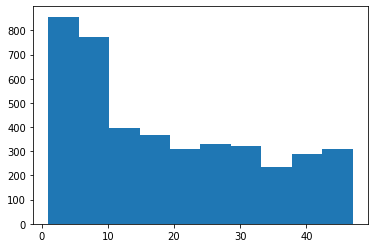

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

코드를 실행하면 히스토그램이 표시됩니다. 회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정한 것을 알 수 있습니다. 이것은 짧은 기간에 고객이 빠져나가는 업계라는 것을 시사합니다.  

그러면 탈퇴하는 회원은 어떤 특징을 가지는지 살펴봅시다.

#탈퇴 회원과 지속 회원의 차이를 파악하자

탈퇴 회원의 특징을 찾아봅시다. 탈퇴 회원과 지속 회원으로 나눠서 비교를 해봅시다.  
앞서 파악한 탈퇴 회원과 지속 회원의 수는 각각 1,350명과 2,840명입니다.

In [ ]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [ ]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


결과를 보면 탈퇴 회원의 매월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값은 모두 지속 회원보다 작습니다. 특히, 평균값과 중앙값은 1.5배 정도 차이가 나는 것을 알 수 있습니다. 반면에 매월 최대 이용 횟수의 평균값은 지속 회원이 높기는 하지만, 탈퇴 회원도 6.4 정도입니다. routine_flg의 평균값은 차이가 크게 나서 지속 회원은 0.98로 많은 회원이 정기적으로 이용하고 있다는 것을 알 수 있지만, 탈퇴 회원은 0.45로 거의 절반은 랜덤하게 이용하고 있다고 생각할 수 있습니다.  

이렇게 행동 데이터를 풀어가면 탈퇴 회원과의 차이를 확인할 수 있으며, 기간을 줄이거나 회원의 재적 기간별로 조사해 나가면 좀 더 많은 것이 보일 것으로 생각됩니다.  

마지막으로 여기까지 사용한 customer_join을 csv로 출력해둡시다.

In [ ]:
customer_join.to_csv("customer_join.csv", index=False)

머신 러닝의 성능은 어떤 데이터로 학습시킬 것인지가 좌우한다고 해도 과언이 아닙니다.  
그래서 데이터의 선택을 위해서 데이터의 주요 특성이 될만한 변수를 잘 파악해야 합니다.

In [ ]:
type('start_date')

str

In [ ]:
type(('log_id', 'max'))

tuple